IMPORT MODULES

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import functions

CONSTANTS

In [18]:
H_0 = 75 #km/s/Mpc
m_0 = -20.45

Investigate relationship between luminosity distance and redshift

_NOTE: We expect a  roughly linear relationship between distance and redshift, known as Hubble’s Law. However, if we extend the measurement to more distant objects, the relation becomes curved, and strongly dependent on the matter content of the Universe._

Text(0, 0.5, 'Redshift $z$')

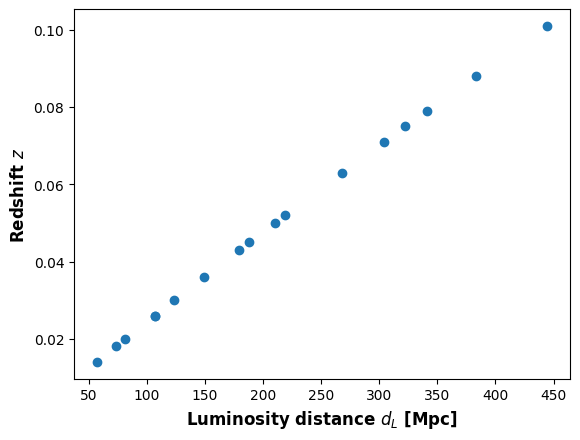

In [19]:
#reads data
name, redshift, eff_peak_mag, mag_err = functions.read_data('sn_data.txt')

#z < 0.1 data
low_redshift_indices = np.where(redshift<0.1)[0]
comoving_distance = functions.get_comoving_distance(redshift[low_redshift_indices[0]:low_redshift_indices[-1]], H_0)
peak_flux, peak_flux_err = functions.get_flux(eff_peak_mag, mag_err, m_0)
#L_peak, L_peak_err = functions.get_peak_luminosity(comoving_distance, redshift[low_redshift_indices[0]:low_redshift_indices[-1]],  peak_flux[low_redshift_indices[0]:low_redshift_indices[-1]], peak_flux_err[low_redshift_indices[0]:low_redshift_indices[-1]])
d_L = functions.get_luminosity_distance(redshift[low_redshift_indices[0]:low_redshift_indices[-1]], comoving_distance)
plt.scatter(d_L/1000, redshift[low_redshift_indices[0]:low_redshift_indices[-1]])
plt.xlabel('Luminosity distance $d_L$ [Mpc]', weight = 'bold', fontsize = 12)
plt.ylabel('Redshift $z$', weight = 'bold', fontsize = 12)

Plotting effective magnitude against luminosity distance and fitting a curve to obtain the peak luminosity.

Text(0, 0.5, 'Effective magnitude $m_{eff}$')

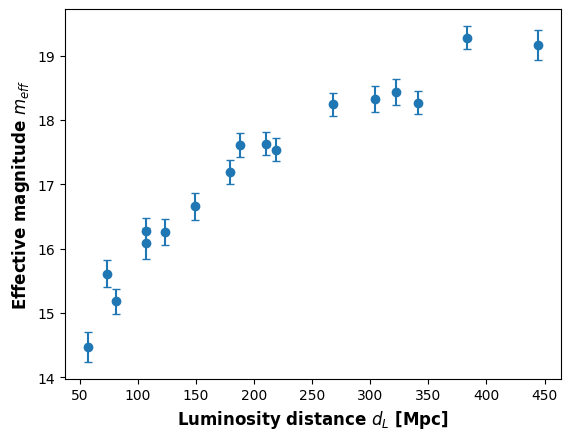

In [20]:
plt.errorbar(d_L/1000, eff_peak_mag[low_redshift_indices[0]:low_redshift_indices[-1]], yerr = mag_err[low_redshift_indices[0]:low_redshift_indices[-1]], 
             ls='none', marker = 'o', capsize = 3)
plt.xlabel('Luminosity distance $d_L$ [Mpc]', weight = 'bold', fontsize = 12)
plt.ylabel('Effective magnitude $m_{eff}$', weight = 'bold', fontsize = 12)

DoF = 16
Optimised parameters =  [3.28642445e+35] 

Covariance matrix = 
 [[2.08988358e+68]]


C:\Users\bradl\AppData\Local\Temp\ipykernel_29112\1986971072.py:16: RuntimeWarning: invalid value encountered in log10
  return -2.5*np.log10(vals[0]/(4*np.pi*x**2)) - 20.45


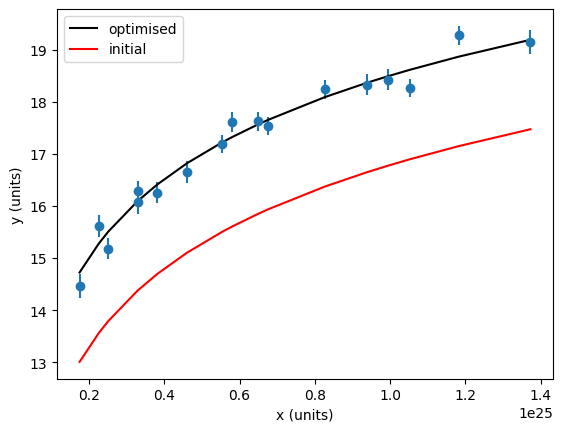

chi^2_min = 21.081780735525914
reduced chi^2 = 1.3176112959703696
$P(chi^2_min, DoF)$ = 0.17538838400431542


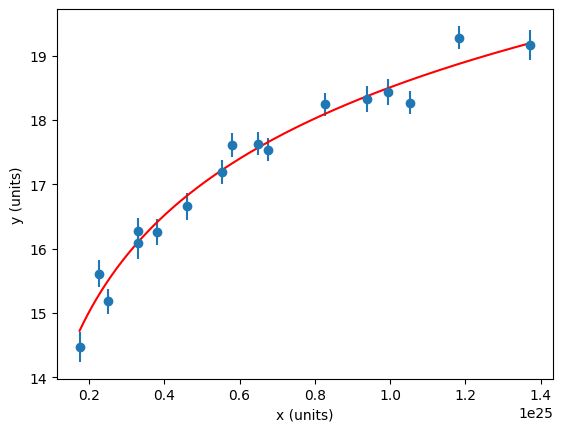

[1.44564296e+34]
optimised parameter[0] = 3.286424453220705e+35 +/- 1.445642963242425e+34


In [21]:
#chi squared fitting
import matplotlib.pyplot as pyplot
import numpy
import scipy.optimize
import scipy.stats

xval = d_L*3.086*10**19 #cm
yval = eff_peak_mag[low_redshift_indices[0]:low_redshift_indices[-1]]
yerr = mag_err[low_redshift_indices[0]:low_redshift_indices[-1]]

#order arrays in ascending order
order = np.argsort(xval)
xval = xval[order]; yval = yval[order]; yerr = yerr[order]

def model_funct(x, *vals):
    return -2.5*np.log10(vals[0]/(4*np.pi*x**2)) - 20.45

initial = numpy.array([1.6*10**36]) # Initial guess for fit parameters

deg_freedom = xval.size - initial.size # Make sure you understand why!
print('DoF = {}'.format(deg_freedom))

popt, cov = scipy.optimize.curve_fit(model_funct, # function to fit
                                     xval, # x data
                                     yval, # y data
                                     sigma=yerr, # set yerr as the array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

print('Optimised parameters = ', popt, '\n')
print('Covariance matrix = \n', cov)

pyplot.figure()
pyplot.errorbar(xval, yval, yerr=yerr, marker='o', linestyle='None')
pyplot.xlabel('x (units)')
pyplot.ylabel('y (units)')

# Generate best fit line using model function and best fit parameters, and add to plot. 
pyplot.plot(xval, 
            model_funct(xval, *popt),  # NOTE that now we need to 'unpack' our optimised parameters with '*'.
            'k', label='optimised')

# We can also plot a calculation based on our initial conditions to ensure that something has actually happened!
pyplot.plot(xval, 
            model_funct(xval, *initial), # We need to 'unpack' our initial parameters with '*'.
            'r', label='initial')

pyplot.legend()
pyplot.show()

def chisq(model_params, x_data, y_data, y_err):
    chisqval=0
    for i in range(len(x_data)):
        chisqval += ((y_data[i] - model_funct(x_data[i], *model_params))/y_err[i])**2 
        # NOTE again the asterisk (*) before 'model_params' here!
    return chisqval
chisq_min = chisq(popt, xval, yval, yerr)
print('chi^2_min = {}'.format(chisq_min))
chisq_reduced = chisq_min/deg_freedom
print('reduced chi^2 = {}'.format(chisq_reduced))
P = scipy.stats.chi2.sf(chisq_min, deg_freedom)
print('$P(chi^2_min, DoF)$ = {}'.format(P))

pyplot.figure()
pyplot.errorbar(xval, yval, yerr=yerr, marker='o', linestyle='None')
pyplot.xlabel('x (units)')
pyplot.ylabel('y (units)')

smooth_xval = numpy.linspace(xval[0], xval[-1], 1001)
pyplot.plot(smooth_xval, 
            model_funct(smooth_xval, *popt), 
            'r')

pyplot.show()

popt_errs = numpy.sqrt(numpy.diag(cov))
print(popt_errs)
for i in range(len(popt)):
    print('optimised parameter[{}] = {} +/- {}'.format(i, popt[i], popt_errs[i]))

L_peak = popt[0]*10**-7
L_peak_err = popt_errs[0]